# Part3: Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

In [18]:
df = pd.read_csv('Data/recipe_cleaned_spacy.csv',index_col=0)

/Users/ajk/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [19]:
df.dropna(inplace = True)
df.reset_index(inplace = True)
df.drop(columns = ['index'], inplace = True)

#### Looking at the Distribution of Ingredient Count 

In [20]:
df['ingredient_count'] = [len(i.split(', ')) for i in df['raw_ingredients']]

(0.0, 30.0)

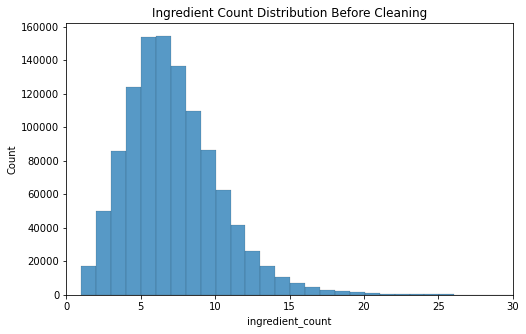

In [28]:
plt.figure(figsize = (8,5))
plt.title('Ingredient Count Distribution Before Cleaning')
sns.histplot(df['ingredient_count'], bins = 400)
plt.xlim(0,30)

##### Observation:
At this moment I realized that certain recipes contained over 20 ingredients, therefore I decided to drop all recipes that contained over 20 recipes.

In [3]:
df2 = pd.read_csv('Data/recipe_cleaned_spacy2.csv',index_col=0)
df2.dropna(inplace = True)
df2.reset_index(inplace = True)
df2.drop(columns = ['index'], inplace = True)

/Users/ajk/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
df2['ingredient_count'] = [len(i.split(', ')) for i in df2['raw_ingredients']]

(0.0, 20.0)

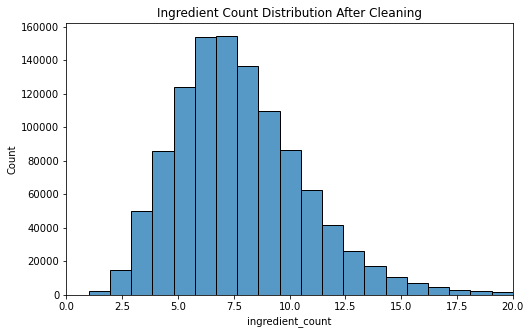

In [31]:
plt.figure(figsize = (8,5))
plt.title('Ingredient Count Distribution After Cleaning')
sns.histplot(df2['ingredient_count'], bins = 20)
plt.xlim(0,20)

In [45]:
df2.shape

(1095610, 6)

/Users/ajk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box Plot Before Cleaning'}, xlabel='ingredient_count'>

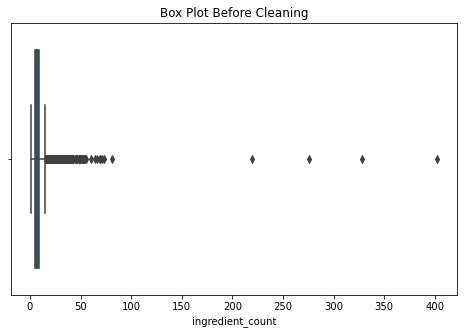

In [37]:
plt.figure(figsize = (8,5))
plt.title('Box Plot Before Cleaning')
sns.boxplot(df['ingredient_count'])


/Users/ajk/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Box Plot After Cleaning'}, xlabel='ingredient_count'>

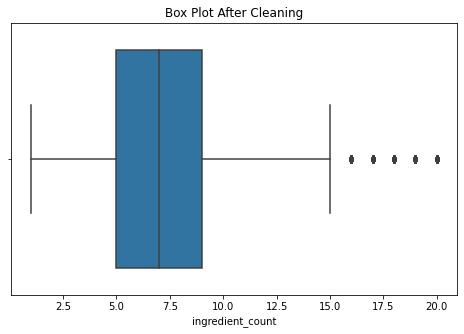

In [40]:
plt.figure(figsize = (8,5))
plt.title('Box Plot After Cleaning')
sns.boxplot(df2['ingredient_count'])


##### Observations:
First looking at the histograms we are able to see that dropping recipes containing over 20 ingredients has made the distribution slightly less skewed to the right. Next looking at the box plots, we are able to see that certain recipes had several hundred ingredients. Looking at that it was a good idea to drop recipes with more than 20 ingredients. Looking at the box plot above, after cleaning, we are able to see that only a couple outliers are left. With that said this is an acceptable distribution for this investigation. 

### Count Vectorizer 

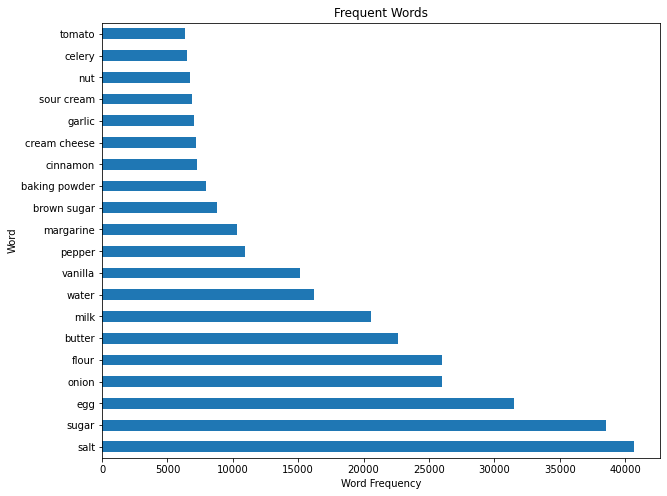

In [6]:
cvec = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec = cvec.fit_transform(df['raw_ingredients'][:100000])

count_df = pd.DataFrame(count_vec.todense(), columns=cvec.get_feature_names())

count_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

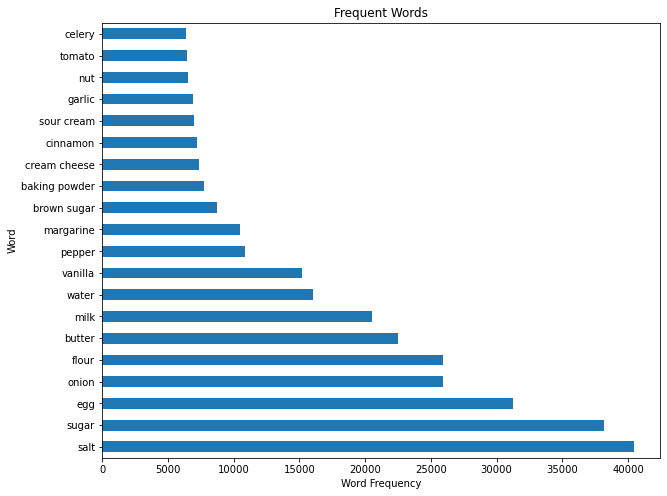

In [12]:
cvec2 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec2 = cvec2.fit_transform(df['raw_ingredients'][100000:200000])

count_df2 = pd.DataFrame(count_vec2.todense(), columns=cvec2.get_feature_names())

count_df2.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

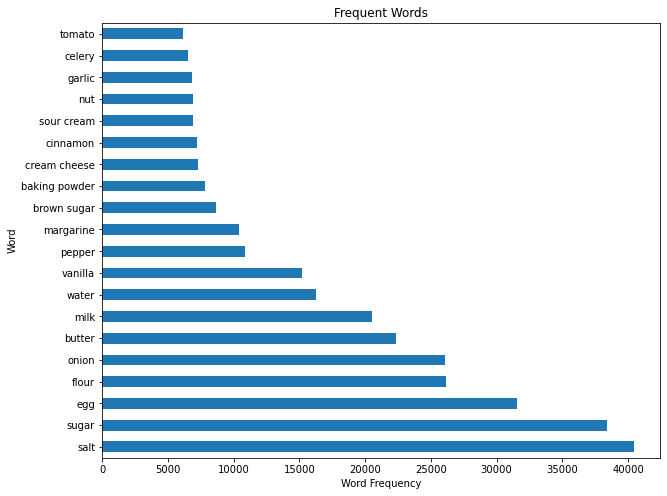

In [8]:
cvec3 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec3 = cvec3.fit_transform(df['raw_ingredients'][200000:300000])

count_df3 = pd.DataFrame(count_vec3.todense(), columns=cvec3.get_feature_names())

count_df3.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

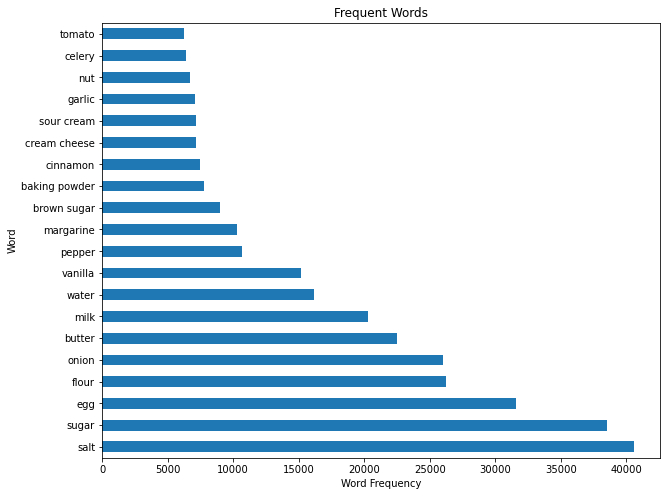

In [9]:
cvec4 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec4 = cvec4.fit_transform(df['raw_ingredients'][300000:400000])

count_df4 = pd.DataFrame(count_vec4.todense(), columns=cvec4.get_feature_names())

count_df4.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

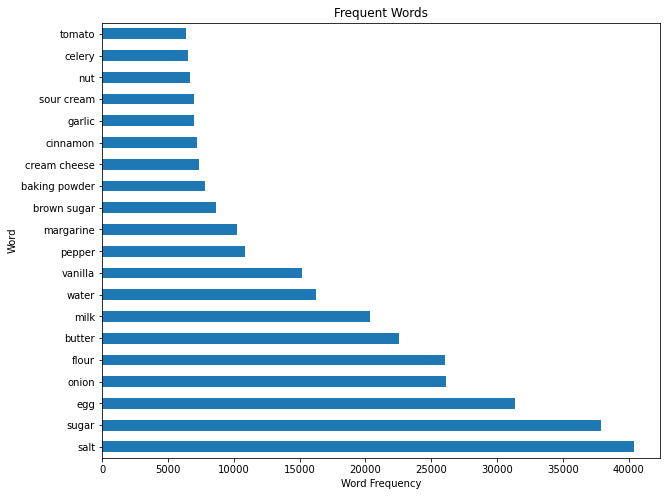

In [10]:
cvec5 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec5 = cvec5.fit_transform(df['raw_ingredients'][400000:500000])

count_df5 = pd.DataFrame(count_vec5.todense(), columns=cvec5.get_feature_names())

count_df5.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

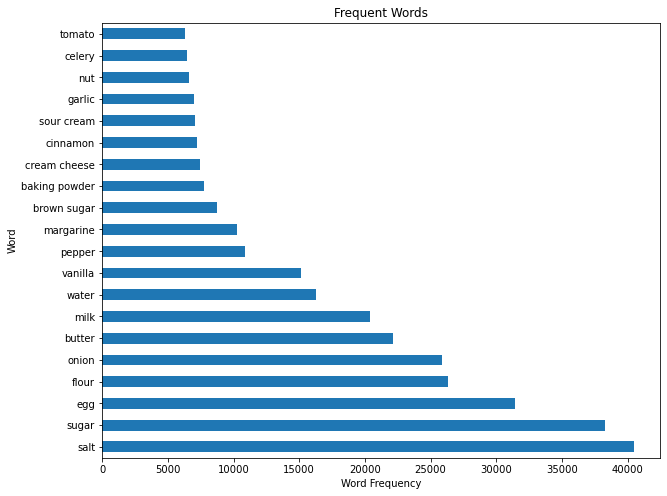

In [11]:
cvec6 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec6 = cvec6.fit_transform(df['raw_ingredients'][500000:600000])

count_df6 = pd.DataFrame(count_vec6.todense(), columns=cvec6.get_feature_names())

count_df6.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

In [8]:
#cvec7 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

#count_vec7 = cvec7.fit_transform(df['raw_ingredients'][600000:700000])

#count_df7 = pd.DataFrame(count_vec7.todense(), columns=cvec7.get_feature_names())

#count_df7.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
#plt.title('Frequent Words')
#plt.xlabel('Word Frequency')
#plt.ylabel('Word');

# This code keeps killing the kernel

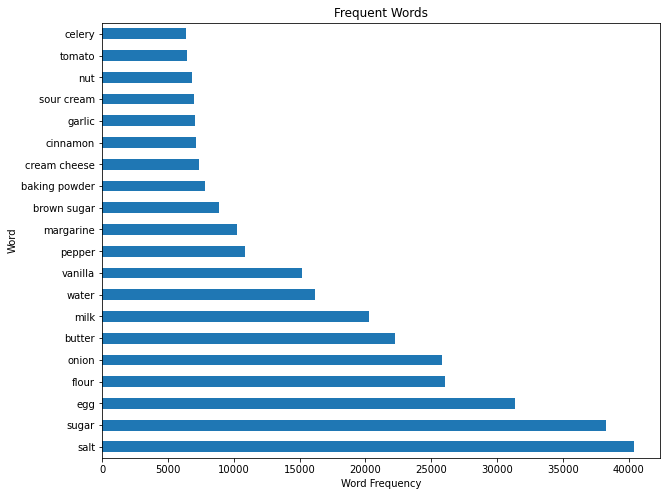

In [5]:
cvec8 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec8 = cvec8.fit_transform(df['raw_ingredients'][700000:800000])

count_df8 = pd.DataFrame(count_vec8.todense(), columns=cvec8.get_feature_names())

count_df8.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

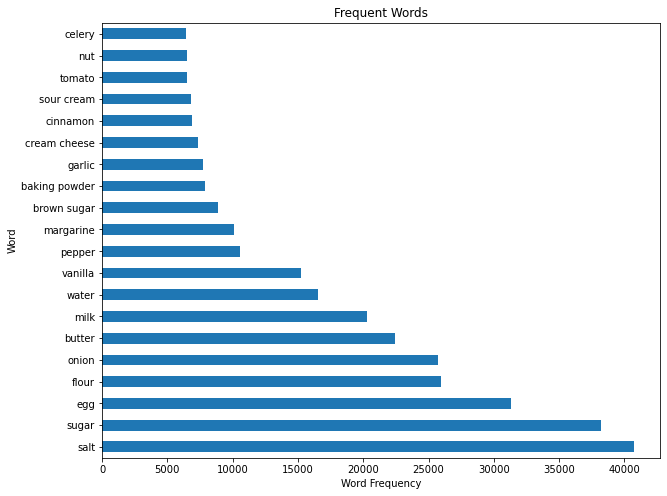

In [6]:
cvec9 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec9 = cvec9.fit_transform(df['raw_ingredients'][800000:900000])

count_df9 = pd.DataFrame(count_vec9.todense(), columns=cvec9.get_feature_names())

count_df9.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

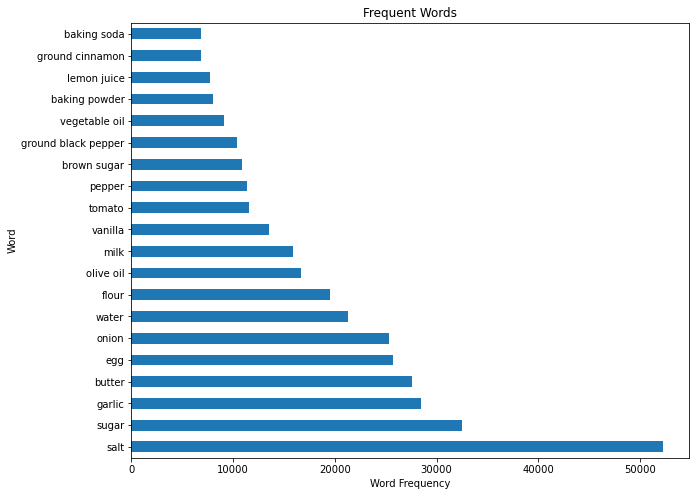

In [7]:
cvec10 = CountVectorizer(stop_words='english',token_pattern='(?u)[a-zA-Z][a-z ]+')

count_vec10 = cvec10.fit_transform(df['raw_ingredients'][900000:1000000])

count_df10 = pd.DataFrame(count_vec10.todense(), columns=cvec10.get_feature_names())

count_df10.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10,8))
plt.title('Frequent Words')
plt.xlabel('Word Frequency')
plt.ylabel('Word');

#### Annotation:
Having such a large data set I am unable to view the count vectorizer for the whole data set. Running the count vectorizer on the csv keeps killing my kernel. I have tried using a GPU on google colab, that does not appear to help. As a result I decided to view the word count for each interval of 100,000 recipes. By doing so it appears that the plot is almost identical for each interval. Because of their almost identical resemblance, I can use the first plot (first 100,000) recipes to represent the word frequency in the data set.

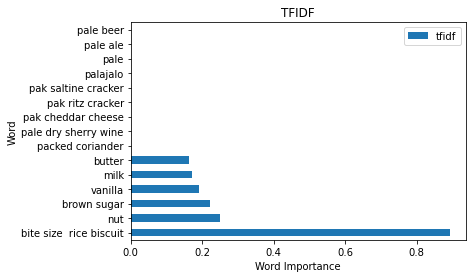

In [9]:
tfidf = TfidfVectorizer(stop_words = 'english', token_pattern='(?u)[a-zA-Z][a-z ]+')
vec_tfidf = tfidf.fit_transform(df['raw_ingredients'])
df_tfidf = pd.DataFrame(vec_tfidf[0].todense().T, index=tfidf.get_feature_names(), columns=["tfidf"])
df_tfidf.sort_values(by=["tfidf"],ascending=False).head(15).plot(kind = 'barh')
plt.title('TFIDF')
plt.xlabel('Word Importance')
plt.ylabel('Word');

##### Observations:
Next, looking at the TFIDF vectorizer, we are able to see that only a few words are given weights. With that said count vectorizer is a better representation of the word frequency in the data set.